In [187]:
#Import libraries
import numpy as np
import pandas as pd

#Import data
nhl_stats = pd.read_csv("C:/Users/Xavix/Downloads/nhl_stats_2018.csv")
nhl_stats.head()

,Team,Pos,Games,Pts,+/-,PIM,SOG,GWG,PPG,PPA,SHG,SHA,Hits,BS
0,WAS,LW,81,89,7,40,338,5,18,10,0,0,223,41
1,EDM,C,82,105,2,52,231,5,16,13,3,0,57,26
2,TOR,C,82,88,19,34,286,8,10,9,0,0,59,53
3,TB,C,82,98,4,37,234,6,19,21,2,0,72,40
4,CHI,RW,81,110,2,22,341,7,9,21,0,0,21,18


In [188]:
# Checking for null values
print(nhl_stats.info())

# Checking for outliers
print(nhl_stats.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    906 non-null    object
 1   Pos     906 non-null    object
 2   Games   906 non-null    int64 
 3   Pts     906 non-null    int64 
 4   +/-     906 non-null    int64 
 5   PIM     906 non-null    int64 
 6   SOG     906 non-null    int64 
 7   GWG     906 non-null    int64 
 8   PPG     906 non-null    int64 
 9   PPA     906 non-null    int64 
 10  SHG     906 non-null    int64 
 11  SHA     906 non-null    int64 
 12  Hits    906 non-null    int64 
 13  BS      906 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 99.2+ KB
None
            Games         Pts         +/-         PIM         SOG         GWG  \
count  906.000000  906.000000  906.000000  906.000000  906.000000  906.000000   
mean    50.502208   22.409492   -0.509934   22.522075   88.232892    1.306843   
std     28.743685  

In [189]:
# Creating dummy variable
team_new = pd.get_dummies(nhl_stats['Team'])

# Check what the dataset 'status' looks like
team_new

,ANH,ARI,BOS,BUF,CAR,CGY,CHI,CLS,COL,DAL,...,PIT,SEA,SJ,STL,TB,TOR,VAN,VGK,WAS,WPG
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
903,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
# Dropping the first column from team dataset
team_new = pd.get_dummies(nhl_stats['Team'], drop_first = True)

# Adding the team_new to the original nhl_stats dataframe
nhl_stats = pd.concat([nhl_stats, team_new], axis = 1)

# Dropping Team as we have created the dummies for it
nhl_stats.drop(['Team'], axis = 1, inplace = True)

nhl_stats

,Pos,Games,Pts,+/-,PIM,SOG,GWG,PPG,PPA,SHG,...,PIT,SEA,SJ,STL,TB,TOR,VAN,VGK,WAS,WPG
0,LW,81,89,7,40,338,5,18,10,0,...,0,0,0,0,0,0,0,0,1,0
1,C,82,105,2,52,231,5,16,13,3,...,0,0,0,0,0,0,0,0,0,0
2,C,82,88,19,34,286,8,10,9,0,...,0,0,0,0,0,1,0,0,0,0
3,C,82,98,4,37,234,6,19,21,2,...,0,0,0,0,1,0,0,0,0,0
4,RW,81,110,2,22,341,7,9,21,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,D,10,1,-4,15,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
902,D,36,3,-7,12,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
903,D,36,3,-2,4,44,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
904,D,3,1,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
# Creating dummy variable
pos_new = pd.get_dummies(nhl_stats['Pos'])

# Check what the dataset pos_new looks like
pos_new


,C,D,LW,RW
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
901,0,1,0,0
902,0,1,0,0
903,0,1,0,0
904,0,1,0,0


In [192]:
# Dropping the first column from pos_new dataset
pos_new = pd.get_dummies(nhl_stats['Pos'], drop_first = True)

# Adding the pos_new to the original nhl_stats dataframe
nhl_stats = pd.concat([nhl_stats, pos_new], axis = 1)

# Dropping 'Pos' as we have created the dummies for it
nhl_stats.drop(['Pos'], axis = 1, inplace = True)

nhl_stats

,Games,Pts,+/-,PIM,SOG,GWG,PPG,PPA,SHG,SHA,...,STL,TB,TOR,VAN,VGK,WAS,WPG,D,LW,RW
0,81,89,7,40,338,5,18,10,0,0,...,0,0,0,0,0,1,0,0,1,0
1,82,105,2,52,231,5,16,13,3,0,...,0,0,0,0,0,0,0,0,0,0
2,82,88,19,34,286,8,10,9,0,0,...,0,0,1,0,0,0,0,0,0,0
3,82,98,4,37,234,6,19,21,2,0,...,0,1,0,0,0,0,0,0,0,0
4,81,110,2,22,341,7,9,21,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,10,1,-4,15,7,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
902,36,3,-7,12,30,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
903,36,3,-2,4,44,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
904,3,1,1,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [193]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(42)
df_train, df_test = train_test_split(nhl_stats, train_size = 0.7, test_size = 0.3, random_state = 100)

In [194]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the dummy variables
scale_vars = ['Games', 'Pts', '+/-', 'PIM', 'SOG','PPG','PPA','SHG','SHA','Hits','BS']

df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])
df_train

<ipython-input-194-a61c845eac34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Games,Pts,+/-,PIM,SOG,GWG,PPG,PPA,SHG,SHA,...,STL,TB,TOR,VAN,VGK,WAS,WPG,D,LW,RW
85,0.674699,0.359375,0.536232,0.300654,0.306849,1,0.35,0.212121,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
849,0.168675,0.000000,0.507246,0.013072,0.027397,0,0.00,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
161,0.975904,0.289062,0.405797,0.183007,0.441096,3,0.20,0.181818,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
821,0.096386,0.000000,0.449275,0.039216,0.008219,0,0.00,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
743,0.144578,0.000000,0.434783,0.000000,0.049315,0,0.00,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0.373494,0.039062,0.434783,0.091503,0.084932,0,0.00,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
871,0.120482,0.007812,0.434783,0.013072,0.043836,0,0.00,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
835,0.301205,0.023438,0.463768,0.124183,0.063014,0,0.00,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
792,0.000000,0.000000,0.507246,0.000000,0.010959,0,0.00,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
# Dividing the training data set into X and Y
y_train = df_train.pop('Pts')
X_train = df_train

In [196]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Pts   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     300.6
Date:                Fri, 31 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:39:47   Log-Likelihood:                 1193.3
No. Observations:                 634   AIC:                            -2293.
Df Residuals:                     587   BIC:                            -2083.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0638      0.011     -5.874      0.000      -0.085      -0.042
Games          0.1101      0.011      9.945      0.000       0.088       0.132
+/-            0.1324      0.012     11.255      0.000       0.109       0.156
PIM            0.0096      0.017      0.563      0.574      -0.024       0.043
SOG            0.2516      0.023     11.066      0.000       0.207       0.296
GWG            0.0106      0.002      6.535      0.000       0.007       0.014
PPG            0.2478      0.017     14.196      0.000       0.214       0.282
PPA            0.3674      0.016     22.493      0.000       0.335       0.400
SHG            0.0482      0.015      3.199      0.001       0.019       0.078
SHA            0.0188      0.011      1.697      0.090      -0.003       0.041
Hits          -0.0362      0.013     -2.868      0.004      -0.061      -0.011
BS            -0.0438      0.014     -3.058      0.002      -0.072      -0.016
ARI            0.0215      0.014      1.571      0.117      -0.005       0.048
BOS           -0.0096      0.012     -0.777      0.437      -0.034       0.015
BUF           -0.0043      0.013     -0.324      0.746      -0.030       0.022
CAR            0.0020      0.013      0.151      0.880      -0.024       0.028
CGY           -0.0009      0.014     -0.066      0.948      -0.028       0.027
CHI            0.0338      0.013      2.511      0.012       0.007       0.060
CLS            0.0134      0.014      0.940      0.348      -0.015       0.041
COL           -0.0130      0.014     -0.963      0.336      -0.040       0.014
DAL           -0.0141      0.014     -0.990      0.323      -0.042       0.014
DET            0.0179      0.014      1.311      0.190      -0.009       0.045
EDM            0.0332      0.013      2.504      0.013       0.007       0.059
FA             0.0014      0.010      0.140      0.888      -0.018       0.021
FLA            0.0031      0.015      0.205      0.837      -0.026       0.032
LA             0.0162      0.013      1.207      0.228      -0.010       0.042
MIN            0.0040      0.015      0.272      0.785      -0.025       0.033
MON           -0.0110      0.013     -0.832      0.406      -0.037       0.015
NJ             0.0046      0.014      0.333      0.739      -0.023       0.032
NSH            0.0106      0.013      0.784      0.433      -0.016       0.037
NYI           -0.0046      0.014     -0.329      0.742      -0.032       0.023
NYR            0.0128      0.015      0.878      0.380      -0.016       0.041
OTT            0.0059      0.014      0.410      0.682      -0.022       0.034
PHI            0.0347      0.014      2.517      0.012       0.008       0.062
PIT            0.0126      0.013      0.938      0.348      -0.014       0.039
SEA            0.0034      0.013      0.254      0.800      -0.023       0.030
SJ

In [197]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Games,23.80
3,SOG,21.11
1,+/-,12.91
10,BS,7.72
9,Hits,6.02
4,GWG,5.66
2,PIM,4.81
22,FA,4.02
5,PPG,3.84
6,PPA,3.82


In [198]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('Games', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     261.5
Date:                Fri, 31 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:39:48   Log-Likelihood:                 1143.9
No. Observations:                 634   AIC:                            -2196.
Df Residuals:                     588   BIC:                            -1991.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0423      0.011     -3.683      0.0

In [199]:
# Calculating the VIFs again for the new model after dropping semi-furnished

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,SOG,14.82
0,+/-,12.91
9,BS,6.10
8,Hits,5.70
3,GWG,5.63
1,PIM,4.76
5,PPA,3.81
4,PPG,3.72
21,FA,3.56
42,D,3.52


In [200]:
X = X.drop('SOG', 1)
# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     166.4
Date:                Fri, 31 Dec 2021   Prob (F-statistic):          3.74e-301
Time:                        14:39:49   Log-Likelihood:                 1001.9
No. Observations:                 634   AIC:                            -1914.
Df Residuals:                     589   BIC:                            -1714.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0295      0.014     -2.061      0.0

In [201]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,+/-,12.90
7,Hits,5.44
8,BS,5.15
1,PIM,4.68
2,GWG,4.58
20,FA,3.51
4,PPA,3.41
41,D,3.40
3,PPG,3.29
42,LW,1.77


In [202]:

X = X.drop('+/-', 1)
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     156.4
Date:                Fri, 31 Dec 2021   Prob (F-statistic):          4.35e-292
Time:                        14:39:50   Log-Likelihood:                 976.59
No. Observations:                 634   AIC:                            -1865.
Df Residuals:                     590   BIC:                            -1669.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0112      0.014      0.823      0.4

In [203]:

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Hits,5.44
7,BS,5.14
0,PIM,4.68
1,GWG,4.38
3,PPA,3.40
40,D,3.33
2,PPG,3.29
41,LW,1.76
19,FA,1.65
42,RW,1.57


In [204]:
X = X.drop('VAN', 1)
# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     160.4
Date:                Fri, 31 Dec 2021   Prob (F-statistic):          3.42e-293
Time:                        14:39:54   Log-Likelihood:                 976.59
No. Observations:                 634   AIC:                            -1867.
Df Residuals:                     591   BIC:                            -1676.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0119      0.010      1.194      0.2

In [205]:
X = X.drop('TB', 1)
# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     164.5
Date:                Fri, 31 Dec 2021   Prob (F-statistic):          2.70e-294
Time:                        14:39:57   Log-Likelihood:                 976.57
No. Observations:                 634   AIC:                            -1869.
Df Residuals:                     592   BIC:                            -1682.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0110      0.009      1.264      0.2

In [206]:
X = X.drop('DAL', 1)
# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_7 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     168.9
Date:                Fri, 31 Dec 2021   Prob (F-statistic):          2.12e-295
Time:                        14:39:57   Log-Likelihood:                 976.54
No. Observations:                 634   AIC:                            -1871.
Df Residuals:                     593   BIC:                            -1689.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0103      0.008      1.257      0.2

In [207]:

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Hits,5.25
7,BS,5.14
0,PIM,4.65
1,GWG,4.28
3,PPA,3.38
2,PPG,3.27
37,D,2.98
38,LW,1.65
5,SHA,1.56
39,RW,1.52


Text(0.5, 0, 'Errors')

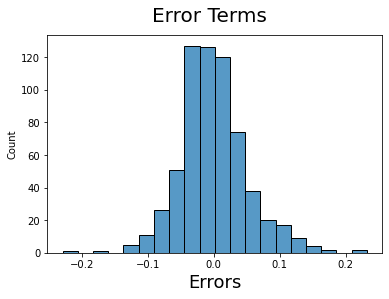

In [208]:
#Check if residuals are normally distributed
#import matplotlib.pyplot as plt
import seaborn as sns
y_train_price = lr_7.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [209]:
scale_vars = ['Games', 'Pts', '+/-', 'PIM', 'SOG','PPG','PPA','SHG','SHA','Hits','BS']
df_test[scale_vars] = scaler.transform(df_test[scale_vars])

df_test

<ipython-input-209-da5a03e6c41a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[scale_vars] = scaler.transform(df_test[scale_vars])
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Games,Pts,+/-,PIM,SOG,GWG,PPG,PPA,SHG,SHA,...,STL,TB,TOR,VAN,VGK,WAS,WPG,D,LW,RW
244,0.698795,0.195312,0.289855,0.130719,0.276712,1,0.15,0.121212,0.000000,0.00,...,0,0,0,0,0,0,0,0,1,0
408,0.746988,0.101562,0.304348,0.169935,0.227397,1,0.00,0.000000,0.000000,0.25,...,1,0,0,0,0,0,0,1,0,0
807,0.530120,0.046875,0.579710,0.176471,0.128767,0,0.00,0.000000,0.000000,0.00,...,0,0,0,0,0,0,0,1,0,0
771,0.168675,0.000000,0.434783,0.098039,0.052055,0,0.00,0.000000,0.000000,0.00,...,0,0,0,0,0,0,0,0,0,0
786,0.060241,0.000000,0.434783,0.039216,0.019178,0,0.00,0.000000,0.000000,0.00,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.662651,0.195312,0.275362,0.039216,0.380822,1,0.15,0.151515,0.000000,0.00,...,0,0,0,0,0,0,0,0,0,0
105,0.975904,0.593750,0.927536,0.078431,0.457534,1,0.40,0.484848,0.166667,1.00,...,0,0,0,0,0,0,0,0,0,0
489,0.397590,0.062500,0.492754,0.130719,0.098630,0,0.00,0.000000,0.000000,0.00,...,0,0,0,0,0,0,0,0,1,0
891,0.168675,0.023438,0.376812,0.026144,0.068493,0,0.00,0.000000,0.000000,0.00,...,0,0,0,0,0,0,0,0,1,0


In [210]:
y_test = df_test.pop('Pts')
X_test = df_test

# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m4 = X_test_m4.drop(["Games", "SOG", "+/-", "TB", "VAN", "DAL"], axis = 1)

# Making predictions using the final model
y_pred_m4 = lr_7.predict(X_test_m4)

In [211]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m4)

0.8670403427728909